 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library
whale_returns_path = Path("Resources/whale_returns.csv")


In [63]:
# Read the data, set the `date` as a datetime index
whale_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [64]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [65]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [66]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [67]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [68]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [69]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [70]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")
sp60_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp60_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [71]:
# Check Data Types
sp60_df.dtypes

Close    object
dtype: object

In [72]:
# Fix Data Types
sp60_df["Close"]= sp60_df["Close"].str.replace("$", "")
sp60_df["Close"]= sp60_df["Close"].str.replace(",", "")
sp60_df["Close"] = sp60_df["Close"].astype(float)
sp60_df['Close'].head(10)

/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
2012-10-09    12273.57
2012-10-10    12212.42
2012-10-11    12233.95
2012-10-12    12202.04
2012-10-15    12229.96
Name: Close, dtype: float64

In [73]:
# Calculate Daily Returns
sp60_returns = sp60_df.pct_change()
sp60_returns.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [74]:
# Drop nulls
sp60_returns = sp60_returns.dropna()

In [75]:
# Rename `Close` Column to be specific to this portfolio.
sp60_returns = sp60_returns.rename({'Close' : 'S&P TSX 60'}, axis=1)
sp60_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [77]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_df = pd.concat([whale_df, algo_df, sp60_returns], axis = "columns", join = "inner")
daily_df.sort_index(ascending=True)
daily_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

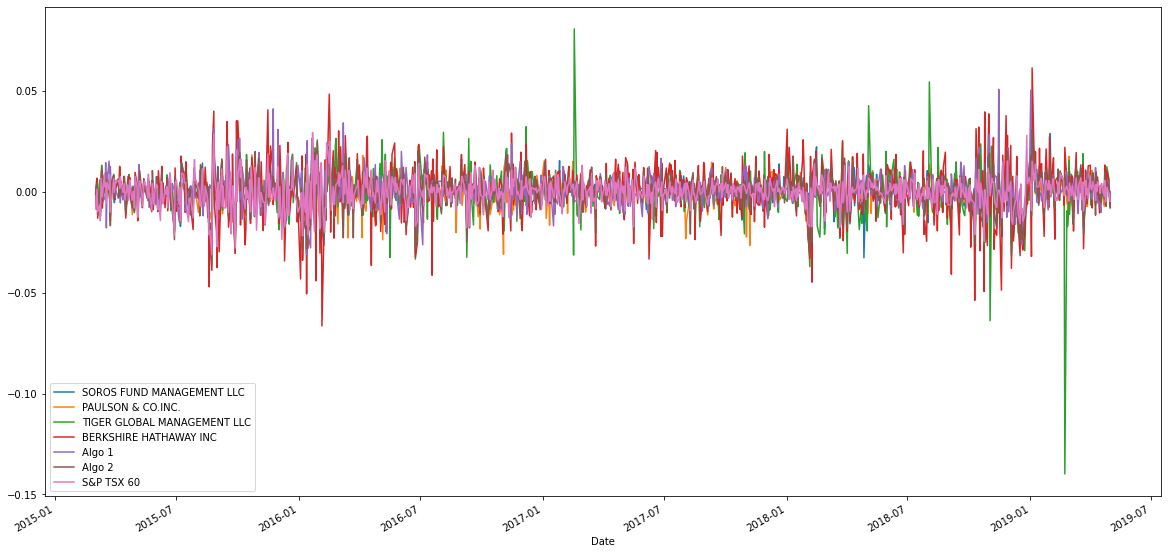

In [78]:
# Plot daily returns of all portfolios
daily_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

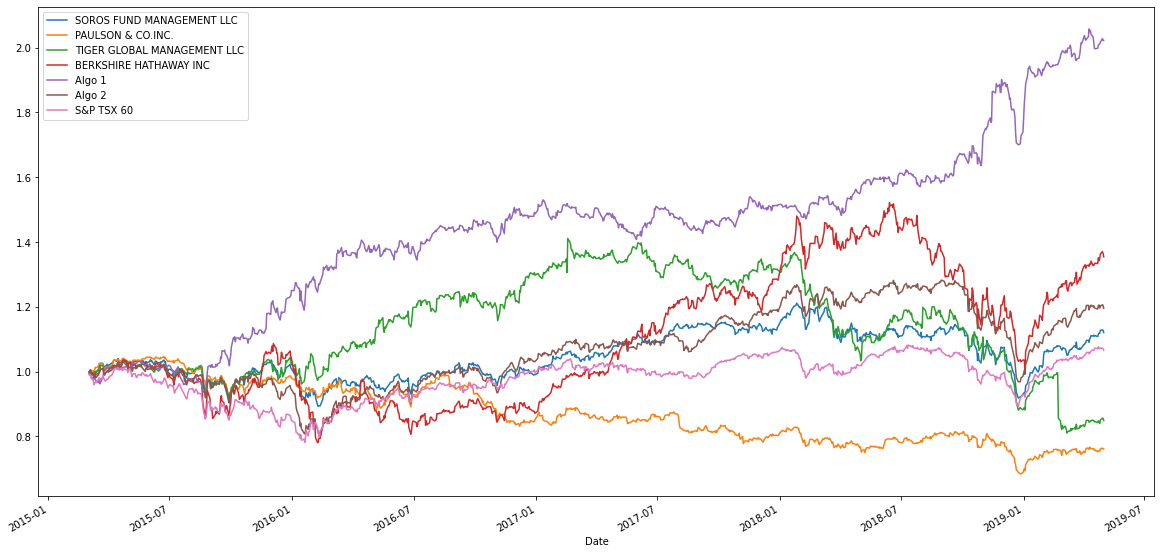

In [79]:
# Calculate cumulative returns of all portfolios
df_cumulative = (1+daily_df).cumprod()
# Plot cumulative returns
df_cumulative.plot(figsize = (20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

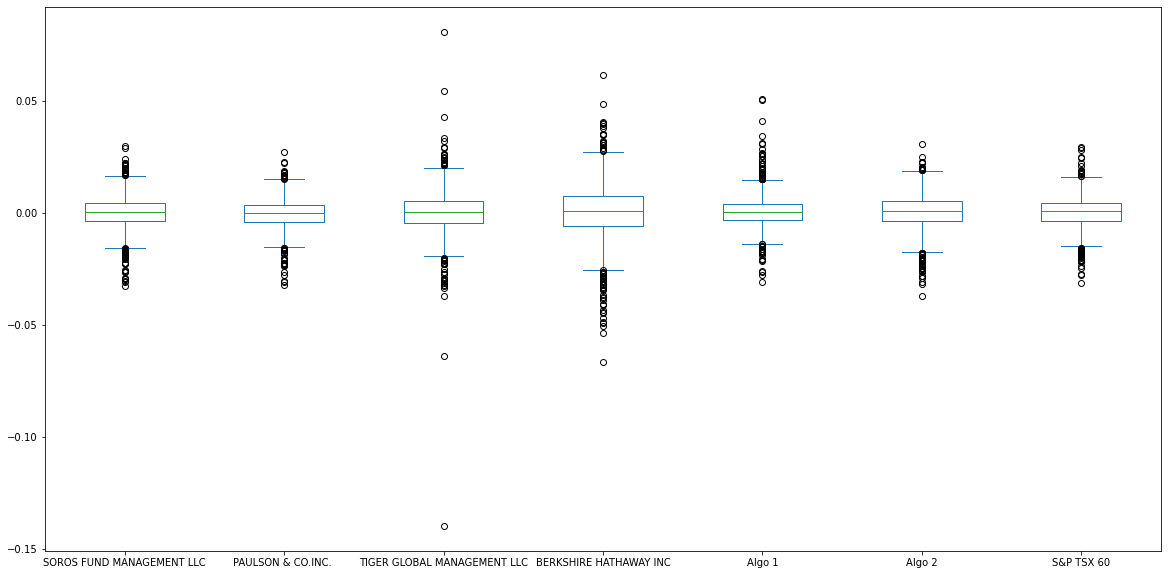

In [80]:
# Box plot to visually show risk
daily_df.plot.box(figsize = (20,10))

### Calculate Standard Deviations

In [82]:
# Calculate the daily standard deviations of all portfolios
daily_df_std = pd.DataFrame(daily_df.std()).rename(columns = {0:"Std"})
daily_df_std.sort_index(ascending=True)
daily_df_std

,Std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX 60,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [83]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = daily_df_std[daily_df_std["Std"] > daily_df_std.loc["S&P TSX 60", "Std"]]
higher_std

,Std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [84]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = daily_df_std*np.sqrt(252)
df_annualized_std

,Std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX 60,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

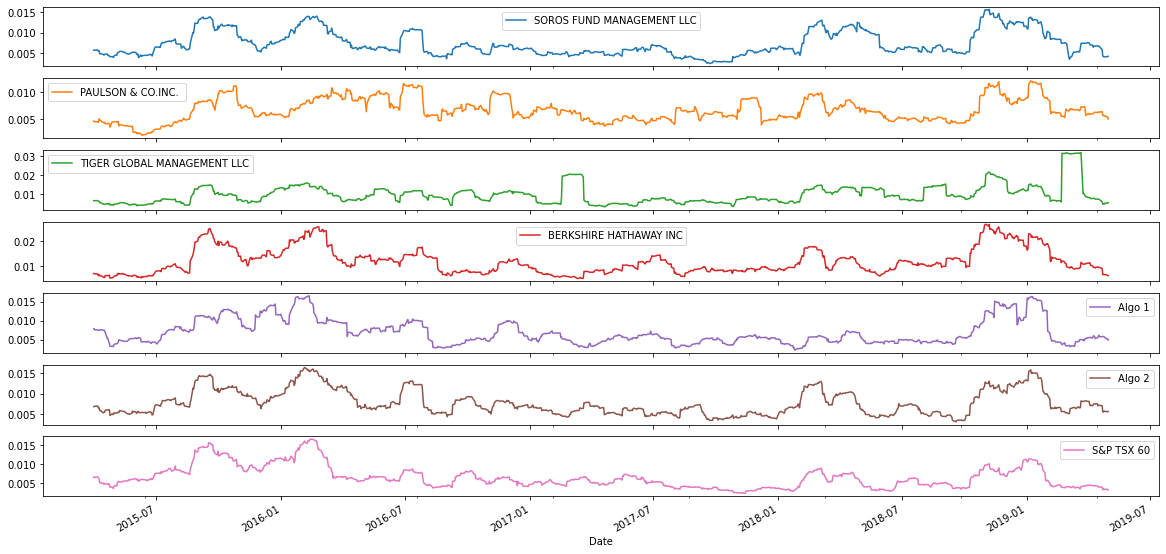

In [85]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp60_rolling_21 = daily_df.rolling(window = 21).std()
# Plot the rolling standard deviation
sp60_rolling_21.plot(subplots=True, figsize = (20,10))

### Calculate and plot the correlation

In [86]:
import seaborn as sns

<AxesSubplot:>

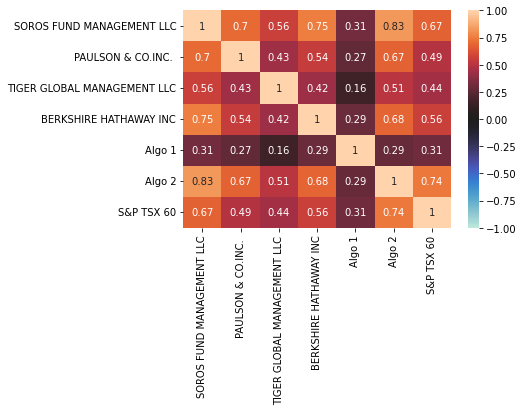

In [87]:
# Calculate the correlation
correlation_sp60 = daily_df.corr()

# Display de correlation matrix
sns.heatmap(correlation_sp60, vmin=-1, vmax=1, cmap= 'icefire', annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

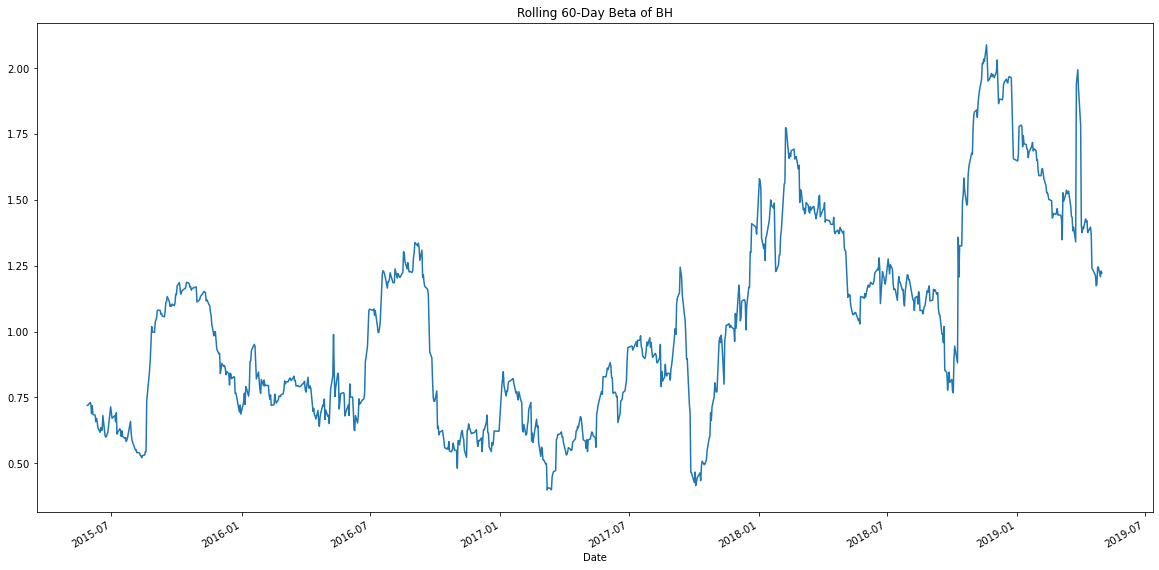

In [88]:
# Calculate covariance of a single portfolio
rolling_covariance = daily_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_df['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance = daily_df['S&P TSX 60'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

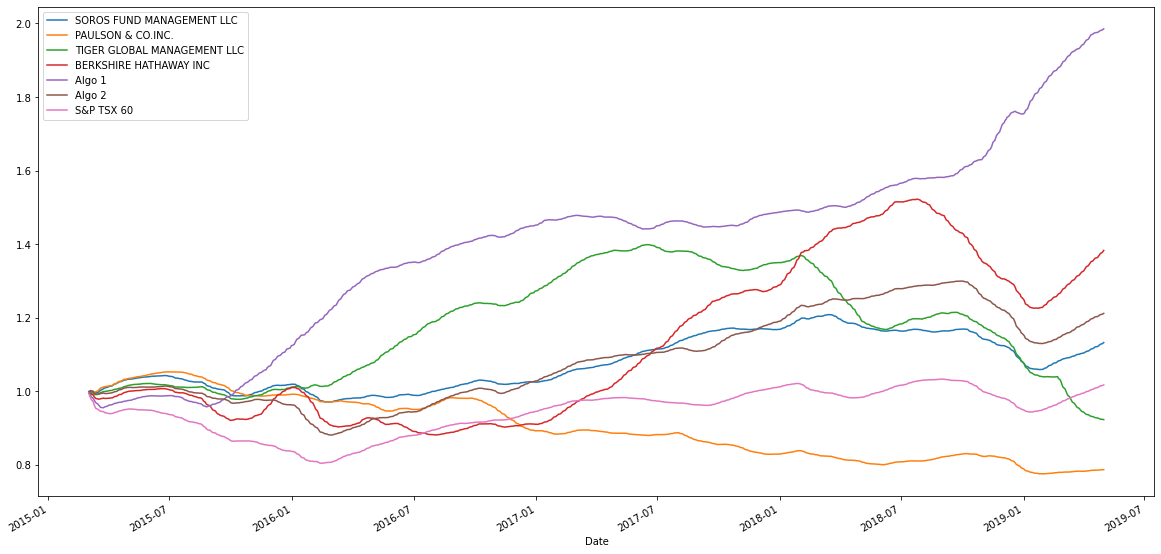

In [89]:
# Use `ewm` to calculate the rolling window
daily_df_ewm = daily_df.ewm(halflife= 21).mean()
(1+daily_df_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [90]:
# Annualized Sharpe Ratios
sharpe_ratios = daily_df.mean()*252/(daily_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

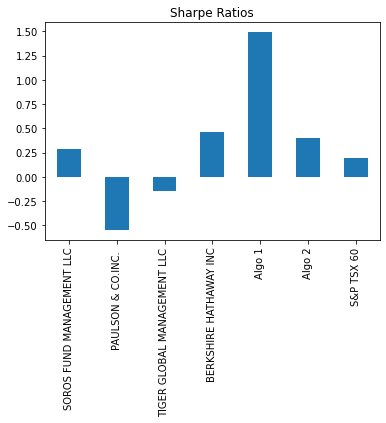

In [91]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Based on the above analysis, Algo 1 and Algo 2 both outperformed the S&P TSX 60 index and the Whales portfolio. Algo 1 substantially outperfomed the market and the whale portfolio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [92]:
# Reading data from 1st stock
AAPL_data_csv = Path("Resources/AAPL_data.csv")
AAPL_df = pd.read_csv(AAPL_data_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
AAPL_df.rename(columns = {"Close": "AAPL"}, inplace=True)
AAPL_df.head()

,AAPL
Date,
2015-03-02 16:00:00,32.27
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65


In [93]:
# Reading data from 2nd stock
MSFT_data_csv = Path("Resources/MSFT_data.csv")
MSFT_df = pd.read_csv(MSFT_data_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
MSFT_df.rename(columns = {"Close": "MSFT"}, inplace=True)
MSFT_df.head()

,MSFT
Date,
2015-03-02 16:00:00,43.88
2015-03-03 16:00:00,43.28
2015-03-04 16:00:00,43.06
2015-03-05 16:00:00,43.11
2015-03-06 16:00:00,42.36


In [94]:
# Reading data from 3rd stock
SQ_data_csv = Path("Resources/SQ_data.csv")
SQ_df = pd.read_csv(AAPL_data_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
SQ_df.rename(columns = {"Close": "SQ"}, inplace=True)
SQ_df.head()

,SQ
Date,
2015-03-02 16:00:00,32.27
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65


In [95]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((AAPL_df,MSFT_df,SQ_df), axis = 1, join="inner")
my_stocks.sort_index(ascending=True, inplace=True)
my_stocks.head()

,AAPL,MSFT,SQ
Date,,,
2015-03-02 16:00:00,32.27,43.88,32.27
2015-03-03 16:00:00,32.34,43.28,32.34
2015-03-04 16:00:00,32.14,43.06,32.14
2015-03-05 16:00:00,31.60,43.11,31.60
2015-03-06 16:00:00,31.65,42.36,31.65


In [96]:
# Reset Date index
my_stocks.index = my_stocks.index.normalize()

In [97]:
# Calculate daily returns
my_stocks_returns = my_stocks.pct_change()

# Drop NAs
my_stocks_returns.dropna(inplace=True)

# Display sample data
my_stocks_returns.head()

,AAPL,MSFT,SQ
Date,,,
2015-03-03,0.002169,-0.013674,0.002169
2015-03-04,-0.006184,-0.005083,-0.006184
2015-03-05,-0.016801,0.001161,-0.016801
2015-03-06,0.001582,-0.017397,0.001582
2015-03-09,0.004423,0.011568,0.004423


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [98]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)

# Display sample data
my_portfolio_returns.head()

Date
2015-03-03   -0.004243
2015-03-04   -0.005743
2015-03-05   -0.009596
2015-03-06   -0.006114
2015-03-09    0.007288
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((my_portfolio_returns,daily_df), axis = 1)
portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace=True)
portfolio_returns.head()


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2015-03-03,-0.004243,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,-0.005743,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.009596,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.006114,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.007288,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [100]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.isnull().sum()


My Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [101]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"Std"})
portfolio_std

,Std
My Portfolio,0.013380
SOROS FUND MANAGEMENT LLC,0.007829
PAULSON & CO.INC.,0.006986
TIGER GLOBAL MANAGEMENT LLC,0.010885
BERKSHIRE HATHAWAY INC,0.012829
Algo 1,0.007593
Algo 2,0.008327
S&P TSX 60,0.007036


### Calculate and plot rolling `std` with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

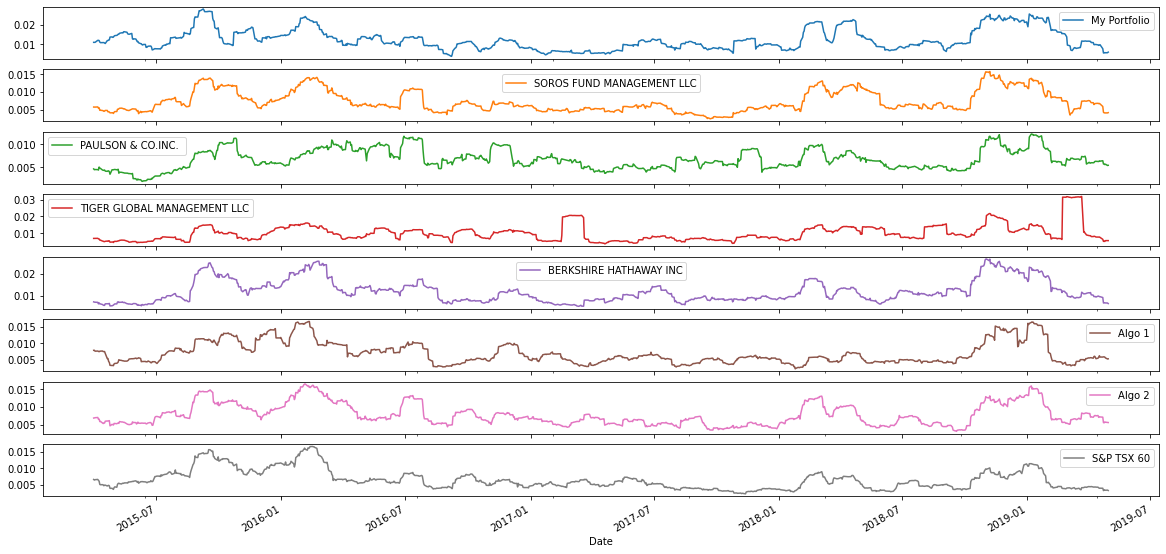

In [102]:
# Calculate rolling standard deviation
my_portfolio_rolling_21 = portfolio_returns.rolling(window = 21).std()

# Plot rolling standard deviation
my_portfolio_rolling_21.plot(subplots=True,figsize=(20,10))

### Calculate and plot the correlation

In [103]:
import seaborn as sns

<AxesSubplot:>

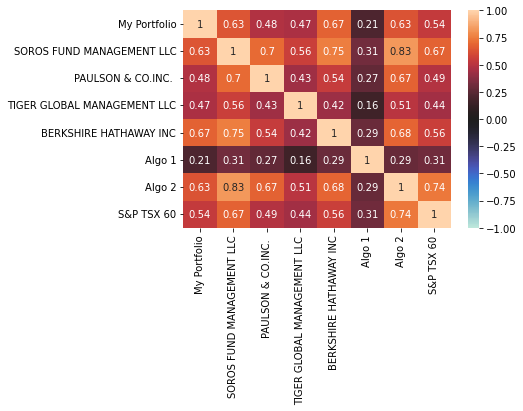

In [104]:
# Calculate and plot the correlation
portfolio_corr = portfolio_returns.corr()
sns.heatmap(portfolio_corr, vmin=-1, vmax=1, cmap= 'icefire', annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

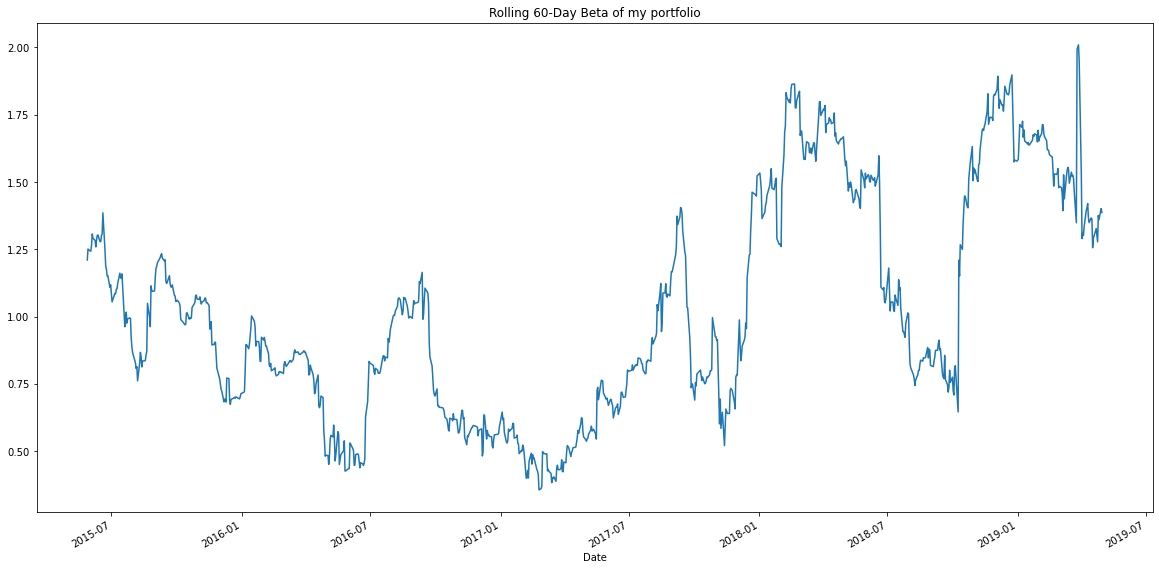

In [105]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['My Portfolio'].rolling(window=60).cov(portfolio_returns['S&P TSX 60'])
rolling_variance = portfolio_returns['S&P TSX 60'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [106]:
# Calculate Annualized Sharpe Ratios
trading_days = portfolio_returns.count()
trading_days

My Portfolio                   1028
SOROS FUND MANAGEMENT LLC      1028
PAULSON & CO.INC.              1028
TIGER GLOBAL MANAGEMENT LLC    1028
BERKSHIRE HATHAWAY INC         1028
Algo 1                         1028
Algo 2                         1028
S&P TSX 60                     1028
dtype: int64

In [107]:
portfolio_sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))
portfolio_sharpe_ratios

My Portfolio                   1.747126
SOROS FUND MANAGEMENT LLC      0.602818
PAULSON & CO.INC.             -1.100562
TIGER GLOBAL MANAGEMENT LLC   -0.269239
BERKSHIRE HATHAWAY INC         0.963001
Algo 1                         3.013564
Algo 2                         0.829741
S&P TSX 60                     0.416090
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios'}>

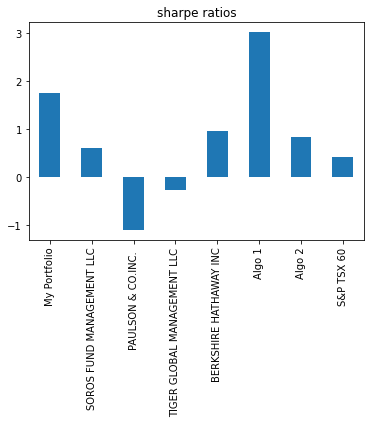

In [108]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind = 'bar' , title = 'sharpe ratios')

In [109]:
my_portfolio.describe()

count    1049.000000
mean       48.471621
std        13.512860
min        30.783333
25%        36.466667
50%        45.243333
75%        60.053333
max        77.356667
dtype: float64

### How does your portfolio do?

My Portfolio has an annual standard deviation of 0.013380, much higher than the S&P TSX 60. My portfolio was the most volatile portfolio compared to all of the other strategies.
The risk vs return is positively demonstrated by my portfolios Sharpe Ratio of 1.75 with a mean return pf 48.47% over the period.
Overall my portfolio demonstrated good returns compared to the market and other strategies however, the higher standard deviation means my portfolio returns came with more risk than the other investment strategies.